### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the Dataset

In [16]:
dataset = pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:, 1:-1].values
y_tx = dataset.iloc[:, -1:].values

In [6]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [13]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [14]:
y_tx = y.reshape(len(y), 1)
y_tx

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

sc_y = StandardScaler()
y_tx = sc_y.fit_transform(y_tx)

### Training the SVR model on the Whole dataset

In [18]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(x, y_tx)

C:\Users\prabo\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

### Predicting the Results

In [19]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

### Visualizing the SVR Results

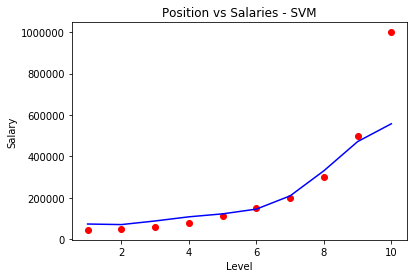

In [20]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y_tx), color='red')
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color='blue')
plt.title("Position vs Salaries - SVM")
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

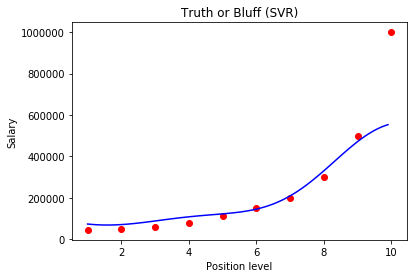

In [32]:
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y_tx), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()